# Transformers

Aims
- Learn the purpose of different components of the transformer architecture
- Understand how transformers work at a high level

## Motivation

Previously, different problems (computer vision, question answering, etc) were tackled best by specialised machine learning models that were very different for each problem. 

This is not ideal, because there are so many different modalities of data that can exist and so many different types of problems that are useful to solve. If we have to come up with a specialised system for each one, progress will take a lot longer. Ideally, we could have one architecture that can tackle them all, much like the human brain can tackle them all.

In 2017, the _transformer_ architecture emerged.

Transformers:
- Are able to process sequential and spatial information in the same format as other information
- Are able to learn how to represent each input in context
- Can process sequences of variable lengths and sizes

Below, is the now famous diagram which shows how the transformer works.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/transformer.png?raw=1)

The transformer can be a complicated model to understand.
Most of the details are not important for everyone to understand.
So to start with, it's useful to simplify this diagram.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Simplified%20Original%20Transformer%20Diagram.png?raw=1)

The transformer can now clearly be seen as 3 parts:

1. The Encoder
1. The Decoder
1. Positional Encoding

Both the encoder and the decoder are types of transformer layers.

Your first win, when it comes to understanding transformers, should be understanding what transformer layers do:

> Transformer layers build a new representation for each part of the input, which can include contextual information from other parts.

E.g.
- If the input is a sequence of words, then the output for each word is the word in context.
- If the input is a bunch of pixels in an image, then the output is the meaning of each of those pixels in relation to all the others.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Independent%20to%20Contextual%20Representations%20from%20a%20Transformer%20Layer.png?raw=1)

Your next win should be understanding the difference between the encoder and decoder transformer layers at a high level:

### Transformer Encoders

> Transformer encoders get to see the entire input (e.g. a sentence) at once.

### Transformer Decoders

> Transformer decoders only see the input sequentially, without looking at the future, but can optionally use the output of an encoder to produce their representations.

### What about the Positional Encoding?

The building blocks of attention layers, which are the main component in transformers, do not have any notion of which order its inputs appear (e.g. which words appear in which order). You're missing a lot of important information without knowing the position of the different parts of the whole input.

> Positional encoding is adding information to each part of the input to indicate which order they appear in

## Encoder-Decoder, Encoder, and Decoder Transformers

By taking a combination of, or just one of either the encoder and decoder, many useful neural network architectures (and now famous models) can be created.

As transformers emerged, famous models of each type were announced:
- BERT: 
    - Encoder only
    - Used to generate excellent word embeddings
        - For example, to represent search queries
- GPT: 
    - Decoder only
    - Used to generate high quality text
        - For example, as a chatbot
- T5: 
    - Encoder and decoder
    - Used for summarization, question answering, text classification

Encoder Transformers:
- Build excellent representations of their inputs because all inputs can immediately and directly see all others
- Access all of the input sequence immediately, including the future, so they aren't suitable for language modelling, where the future should be hidden

Decoder Transformers:
- Are suitable for autoregressive tasks, where the output is generated sequentially
- Only see the past, so can not build representations based on the future
- When these models do not have a counterpart encoder transformer, the decoder does not have the middle block of multi-head cross attention as it does in the encoder-decoder setting

Encoder-Decoder Transformers:
- Perhaps the best of both worlds? Although do we need all of those parameters in both transformer blocks?
- Excel at sequence to sequence tasks like summarisation or translation, where all of the input sequence is available in advance, because they can use their encoder to firstly buid excellent contextual representations of that sequence before using them during decoding.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Encoder%2C%20Decoder%2C%20Encoder-Decoder%20Transformers.png?raw=1)


All of the models mentioned above are available online. Not just the architectures, but the weights too!

> Transformers are typically pre-trained

Famous pre-trained transformer models can be used straight off the shelf.

In [9]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.1 MB/s eta 0:00:00


In [10]:
# get GPT from huggingface
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Encode a text inputs
text = "Who was Richard Branson? He was a"
indexed_tokens = tokenizer.encode(text)

# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

print(predictions.shape)

# get the predicted last token
print(torch.argmax(predictions[0, -1, :]))
predicted_index = torch.argmax(predictions[0, -1, :]).item()
print(predicted_index)
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
print(predicted_text)


torch.Size([1, 9, 50257])
tensor(18828)
18828
Who was Richard Branson? He was a billionaire



## Keep the Transformer the Same, Just Change the Training Objective

A lot of work has been done on exploring transformer architectures. Although it's not yet fully understood why they work so well, the best known transformers are not that different from what was announced originally.

> Much progress has been made by keeping the transformer architecture the same, and instead changing the format of the input/output.

Examples:
- BERT is trained to predict blank words missing from it's input
- GPT is trained to predict the next word
- T5 is trained to solve _span corruption_

With minor changes to the following class, you could solve lots of different problems just by changing how you represent the inputs and outputs.

In [11]:
import torch

class MinimalTransformer(torch.nn.Module):
    """
    A transformer implemented in the minimal number of lines of code.
    """

    def __init__(self):
        super().__init__()
        self.embedding = torch.nn.Embedding(100, 512)   #100 is the size of vocab
        self.positional_encoding = torch.nn.Embedding(100, 512)
        self.transformer = torch.nn.Transformer(d_model=512, nhead=8, num_encoder_layers=6, num_decoder_layers=6)
        self.classification_head = torch.nn.Linear(512, 100)

    def forward(self, x):
        x = self.embedding(x)
        x = x + self.positional_encoding(torch.arange(0, x.shape[1]).unsqueeze(0))
        x = self.transformer(x)
        x = self.classification_head(x)
        return x

model = MinimalTransformer()

print(model.transformer.modules)


<bound method Module.modules of Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
    

## The Transformer Layer

Transformers are made up of transformer layers.

> Transformer layers have the same number of outputs as they do inputs

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Single%20Transformer%20Layer.png?raw=1)

These transformer layers are stacked together. This, like in other kinds of neural networks, allows transformers to build hierarchically more complex representations of their inputs through deeper layers.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Stacked%20Transformer%20Layers.png?raw=1)

> Encoder and decoder blocks are usually stacked on top of each other, to produce multi-layer encoders or decoders

E.g. 
- "BERT Base" has 12 encoder blocks stacked end-to-end
- "BERT Large" has 24 encoder blocks stacked end-to-end

## Making Predictions from Transformer Layer Outputs

Attention modules output a series of vectors for each input. So how do we get predictions?

> Typically, predictions are made from transformers by applying a linear classification head to one or a few of the output vectors

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Predictions%20from%20Transformers.png?raw=1)

The output model head can be applied to any of the outputs of the transformer.

In the simplest case, the classification head processes the final output of the transformer to predict a probability distribution over the words that could come next.


<!-- ## Fine-Tuning

Some organisations have invested massive amounts of time, money and research into training transformers that perform useful tasks. It's incredible that you can use leverage that work in just a few lines of Python code.

Because the pre-training can be so useful, it often makes more sense to format a new problem as a sequence of tokens, rather than train a new model from scratch. -->
<!-- 
Examples:
- Sentence classification (e.g. sentiment analysis)
    - Input format: `[[START], "that", "was", "truly", "excellent:, [EXTRACT]`
    - Prediction: Classification head applied to the attention module's output representation for the `[EXTRACT]` token -->


## Inside the Transformer Block

Inside, encoder and decoder transformer blocks look similar.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Encoder%2C%20Decoder%2C%20Encoder-Decoder%20Transformers.png?raw=1)

The essential component that characterises every transformer block, is the multi-head attention layer.

> Essentially, the multi-head attention layer allows each transformer layer to build a representation of each input in a way that combines information from any other part of the input

The transformer block might sound similar to a fully connected layer, in the sense that everything is connected to everything. 
But importantly:
- The weight of the connection between each part of the input changes for different inputs
- Attention layers can take an input of any size with a fixed number of parameters

We'll see how in a moment.

## Understanding Multi-Head (Self-)Attention

### Overall, here's how multi-head self attention works:

1. A inputs are linearly projected to form queries, keys, and values
1. The attention layer computes the weighting of relevance each part of the input has on each other, based on how well the queries align with the keys
1. The attention layer takes a weighted average of the values
1. Each head of the multi-head attention layer allows each part of the input to pay attention to other parts in different ways, computing different contextual representations
1. The residual layer allows the gradient to flow backward through this layer easily, even when the gradients of the parameters within the layer are small
1. The layer normalisation stabilises the training by making more consistent inputs to the following layer
1. The feedforward layer "processes" the output of the attention mechanism, applying a nonlinearity to it

## Queries, Keys, Values

Overall, transformers need to figure out how each part of the input should pay attention to one another.

To do this, it comes up with a vector representation of:
- What each part of the input **represents**, known a the value
- What each part of the input **should look for in other parts of the input**, known as the query
- What each part of the input **should tell other other parts it contains**, known as the key

The queries, keys, and values are computed by doing a linear projection of the input representation with three separate weight matrices $Q$, $K$, $V$.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Q%2CK%2CV%20Projection.png?raw=1)


Each of those projections introduces new weights to the layer.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Q%2CK%2CV%20Weights.png?raw=1)

The attention layer then compares the keys to the queries by performing a dot product. 
This produces unnormalised similarity scores between each part of the input. 

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Attention%20Scores.png?raw=1)

> Having separate query, key, and value representations allows inputs to attend to each other asymmetrically. Input 1 doesnt have to pay as much attention to input 2 as input 2 pays to input 1.

Intuitively, this might be useful in a sentence that contains the phrase "the person". The word "the" should probably be paying a lot of attention to the word "person", because that is really what "the" is referring to. But the word "person" doesn't gain much useful information by paying a lot of attention to the word "the".

Assuming that the keys and queries with dimension $d_k$ have mean 0 and variance 1, then their dot product will have mean 0 and variance $d_k$.
To achieve a unit standard deviation, which is equal to the square root of the variance, we scale the score down by $\sqrt{d_k}$.

These similarity scores are then normalised using a softmax to get a set of attention values that are between 0-1 and sum to 1.


The attention scores are the weights used to compute a new representation of this part of the input as a weighted average of the available input value vectors (including itself).

Finally, we arrive at the final equation that summarises the attention mechanism:

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Attention%20Equation.png?raw=1)

> Notice that the queries, keys, and values can be a different dimensionality than the input, so the final output must be projected back into the input space using a linear layer.

Overall, single-headed attention can be represented as in the diagram below.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Attention%20Steps.png?raw=1)

> Attention is still expensive to compute, becacause the query of every input must be multiplied by the key of all others, making it quadratically complex with the sequence length

Computational complexity per layer
- Self-attention: $O(n^2 d)$
- Recurrent Neural Networks: $O(nd^2)$

Assuming a fixed model size, this makes computing each layer takes the fewer operations with an attention layer than an RNN when the sequence length is smaller than the model dimesionality, which is the case in most situations. E.g. GPT uses 768 dimensional $Q$, $K$, $V$ representations.

But another important thing makes a huge difference...

> Many of the operations inside the attention mechanism can be performed in parallel

Numer of sequential operations for different models:
- Self-attention: $O(1)$
- Recurrent Neural Network: $O(n)$

This means:

> As long as computing the attention scores can be parallelised, then transformers can process sequences of any length in constant time

This is in stark contrast to recurrent models like RNNs, which required each representation in the next layer to be computed sequentially.

#### Self-Attention and Cross Attention

> All kinds of transformer blocks contain a _self-attention layer_.

Within a self-attention block, every representation is queried against each other.
This means that the query used in self-attention comes from within the layer it**self**, hence the name "self-attention".

This is in contrast to cross-attention, where the query comes from a different source than the keys and values.

> In encoder-decoder transformers, the middle layer of a transformer decoder performs cross attention between the decoder and the encoder, where the keys and values used in the attention mechanism come from the encoder, and the queries come from the self-attention part of the decoder in the layer just before

In the original attention paper, where attention was applied to a seq2seq model (another encoder-decoder architecture), the query came from the decoder, and the values came from the encoder (there were no keys).

> The decoder in encoder-decoder architecture transformers has cross-attention as well as self-attention, but when standing alone, without an encoder, transformer decoders do not have a cross-attention layer

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Decoder%2C%20Encoder-Decoder%20Transformers.png?raw=1)


### Every part of the Transformer Block uses Residual Layers

> Every sub-layer of each decoder or encoder block is a residual layer

Reminder: A residual layer is one where the original input is added to the transformed input.

## $out = residual(X) = F(X) + X$

Residual layers:
- Allow gradients of a loss to flow back to model parameters through many layers, without being interrupted, exploding, or vanishing
    - Because the gradient of the $+ X$ term is always constant
- Extend the idea of neural networks _gradually_ changing the input into a format more like the output
    - E.g. The function $F$ within a residual layer can learn to take away the color of the image, if that's useful, rather than learning to reconstruct the whole input without color in just one transformation
    - The difference between layers should be easier to learn than the output of a layer

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Transformer%20Residual%20Connections.png?raw=1)

### Why the Feedforward Layer at the End of Each Encoder/Decoder?

The feedforward layer is a single hidden layer neural network) at the end of each encoder/decoder. It "processes the outputs" from the attention layer.

<!-- Attention layers only let elements in the same position of their representation interact. The feedforward layers let all of the elements of the attention layer output interact. -->

> The feedforward layer is applied to each of the attention output vectors one by one.

The result of this is a set of the same number of vectors, and typically of the same size.

Interestingly, in the GPT models, the hidden layer is larger than the input and output of the feedforward network.

The output of multi-head cross-attention and self-attention blocks are essentially a set of $T$ vectors, which are each a weighted average of the _values_ of the $T$ input vectors.

> Without the nonlinearities on the feedforward NN layers, stacked attention blocks would be equivalent to weighted averages of the input values.

Stacking multiple encoder/decoder blocks together without feedforward layers would not increase the capacity of the model.

### What Does the Single-Head Attention Layer Look Like?

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Attention%20Steps.png?raw=1)

### Multi-Head

> Instead of having one extremely good representation for the query, key, and value, it can be better to have several "good enough" representations.

This allows the different heads to be able to focus on different things, instead of having one representation try to capture all of the ways that a single input should represent what is should look for (query), what it should be looked for by (key), or what it contains (value).

> Each additonal head allows the input representation to communicate with others in a different way.

> The query, key, value vectors in each head are smaller than those that would be present in single-headed attention. For a multi-head attention layer with $H$ heads, and input size $d_{model}$, the queries, keys, and values typically have size $d_{model}/H$

These smaller representations contain less information, but can be good enough.

### Again, here's how multi-head self attention works:

1. A inputs are linearly projected to form queries, keys, and values
1. The attention layer computes the weighting of relevance each part of the input has on each other, based on how well the queries align with the keys
1. The attention layer takes a weighted average of the values
1. Each head of the multi-head attention layer allows each part of the input to pay attention to other parts in different ways, computing different contextual representations
1. The residual layer allows the gradient to flow backward through this layer easily, even when the gradients of the parameters within the layer are small
1. The layer normalisation stabilises the training by making more consistent inputs to the following layer
1. The feedforward layer "processes" the output of the attention mechanism, applying a nonlinearity to it

## Attention Can Make Models Somewhat Interpretable

The attention weights computed within an attention layer can be visualised:

In [13]:
# visualise the attention matrix in a bert model for an example sentence using huggingface transformers library
import transformers
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # Load pre-trained model tokenizer
bert = BertModel.from_pretrained('bert-base-uncased') # Load pre-trained model

sentence = "The tired cat sat on the mat" # Example sentence
token_ids = tokenizer.encode(sentence) # Convert sentence to token ids
token_ids = torch.tensor(token_ids).unsqueeze(0) # Add batch dimension

print("Input tokens:", token_ids)

attentions = bert(token_ids, output_attentions=True).attentions # Get the attention matrices
first_layer_attention = attentions[0] # Get the first layer attention matrix
first_layer_attention = first_layer_attention.squeeze() # Remove the batch dimension
first_head_attention = first_layer_attention[0] # Get the first head attention matrix

print("Attention shape:", first_layer_attention.shape)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Input tokens: tensor([[  101,  1996,  5458,  4937,  2938,  2006,  1996, 13523,   102]])
Attention shape: torch.Size([12, 9, 9])


In the cell below, we visualise the how each of the input values attend to each other:

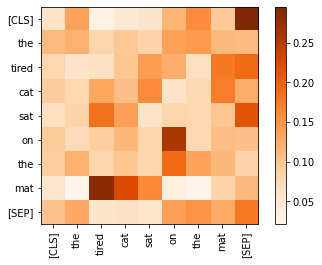

In [14]:
import matplotlib.pyplot as plt

# dummy_attention_scores = torch.rand(T, T)

def show_attention(tokens, attention_scores):
    # attention_scores: T x T
    # tokens: T
    plt.imshow(attention_scores.detach().numpy(), cmap='Oranges')
    # set the ticks to be the tokens
    plt.xticks(range(len(tokens)), tokens, rotation=90)
    plt.yticks(range(len(tokens)), tokens)
    # show legend
    plt.colorbar()

tokens = tokenizer.convert_ids_to_tokens(token_ids.squeeze()) # Convert token ids to tokens

show_attention(tokens, first_head_attention)

You might have expected the attention weights to look a little different. 
Shouldn't "it" be paying attention to "cat"? 
Remember, this is only the first head.

> The different heads of each model allow each input to attend to different things

Let's visualise all of the heads together.

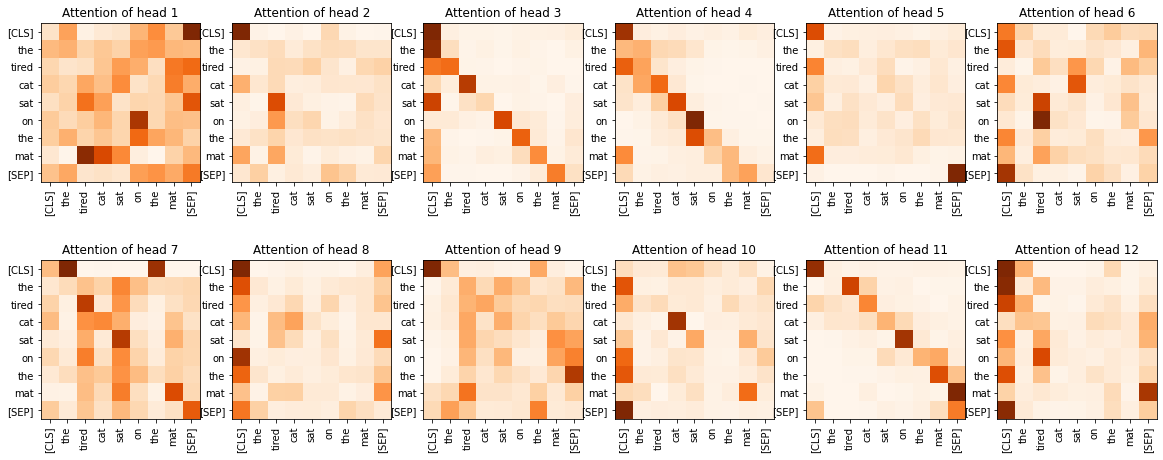

In [15]:
# show grid of attention matrices in different subplots

# first_layer_attention: 1 x 12 x T x T

def show_attention_multiple_subplot(tokens, attentions, layer=0):
    # attentions: L x B x T x T
    H, T, _ = attentions.shape
    rows, cols = 2, 6
    fig, axs = plt.subplots(rows, cols, figsize=(20, 8))
    for i, attention_map in enumerate(attentions):
        ax = axs[i//cols, i%cols]
        ax.imshow(attention_map.detach().numpy(), cmap='Oranges')
        ax.set_xticks(range(len(tokens)))
        ax.set_yticks(range(len(tokens)))
        ax.set_xticklabels(tokens, rotation=90)
        ax.set_yticklabels(tokens)
        ax.set_title(f"Attention of head {i+1}")
    plt.show()

show_attention_multiple_subplot(tokens, first_layer_attention)


You can visualise the attention weights within BERT and other transformers [here](https://huggingface.co/exbert/?model=gpt2&modelKind=bidirectional&sentence=The%20girl%20ran%20to%20a%20local%20pub%20to%20escape%20the%20din%20of%20her%20city.&layer=0&heads=..0,1,2,3,4,5,6,7,8,9,10,11&threshold=0.7&tokenInd=null&tokenSide=null&maskInds=..&hideClsSep=true).

## Implementing Attention from Scratch

An implementation of the attention module might look something like this.

In [5]:
import torch
class Attention(torch.nn.Module):
    def __init__(self, D):
        super().__init__()
        self.D = D
        self.WQ = torch.nn.Linear(D, D)
        self.WK = torch.nn.Linear(D, D)
        self.WV = torch.nn.Linear(D, D)
        self.WO = torch.nn.Linear(D, D)

    def forward(self, Q, K, V, return_attention=False):
        # Q, K, V: B x T x D
        B, T, D = Q.shape

        # PROJECT Q, K, V
        Q = self.WQ(Q)
        K = self.WK(K)
        V = self.WV(V)

        # COMPUTE ATTENTION SCORES
        attention_scores = Q @ K.transpose(-2, -1)
        attention_scores /= torch.sqrt(torch.tensor(D))
        print('attention_scores.shape',attention_scores.shape)
        attention_weight = torch.nn.functional.softmax(attention_scores, dim=-1)
        print('attention_weight.shape',attention_weight.shape)
        # WEIGHTED SUM OF V
        out = attention_weight @ V
        out = out.view(B, T, D)

        # PROJECT BACK TO D
        out = self.WO(out)

        if return_attention:
            return attention_weight

        return out
    
B = 16 # batch size
T = 12 # sequence length
D = 300 # embedding size

original_input = torch.rand(B, T, D)
attention = Attention(D=300)
attention_output = attention(original_input, original_input, original_input)
print(attention_output.shape)


attention_scores.shape torch.Size([16, 12, 12])
attention_weight.shape torch.Size([16, 12, 12])
torch.Size([16, 12, 300])


torch.Size([16, 12, 12])


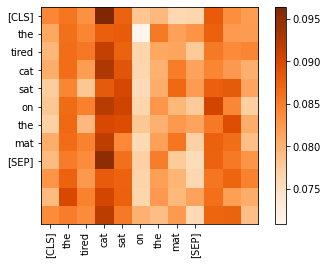

In [17]:

B = 16  # batch size
T = 12  # sequence length
D = 300  # embedding size

original_input = torch.rand(B, T, D)

attention = Attention(D=300)
batch_attention_scores = attention(original_input, original_input, original_input, return_attention=True)
example_attention_scores = batch_attention_scores[0]

show_attention(tokens, example_attention_scores)

## Implementing Multi-Head Attention from Scratch

Now we can extend the layer to multi-head attention by splitting the projections into as many heads as we want:

In [18]:
class AttentionHead(torch.nn.Module):
    def __init__(self, D, head_size):
        super().__init__()
        self.head_size = head_size
        self.WQ = torch.nn.Linear(D, head_size)
        self.WK = torch.nn.Linear(D, head_size)
        self.WV = torch.nn.Linear(D, head_size)

    def forward(self, Q, K, V):
        # Q, K, V: B x T x D

        # PROJECT Q, K, V
        Q = self.WQ(Q)
        K = self.WK(K)
        V = self.WV(V)

        # COMPUTE ATTENTION SCORES
        attention_scores = Q @ K.transpose(-2, -1)
        attention_scores /= torch.sqrt(torch.tensor(self.head_size))
        attention_weight = torch.nn.functional.softmax(attention_scores, dim=-1)

        # WEIGHTED SUM OF V
        out = attention_weight @ V
        out = out.view(B, T, self.head_size)

        return out
    
class MultiHeadAttention(torch.nn.Module):
    def __init__(self, D, num_heads=8):
        super().__init__()
        head_size = D // num_heads
        self.D = D
        self.num_heads = num_heads
        self.heads = torch.nn.ModuleList([AttentionHead(D, head_size) for _ in range(num_heads)])
        self.WO = torch.nn.Linear(D, D)

    def forward(self, Q, K, V, return_attention=False):
        # Q, K, V: B x T x D

        # APPLY HEADS
        out = [head(Q, K, V) for head in self.heads]
        out = torch.cat(out, dim=-1)

        # PROJECT BACK TO D
        out = self.WO(out)

        if return_attention:
            return out

        return out

B = 16  # batch size
T = 12  # sequence length
D = 768  # embedding size

original_input = torch.rand(B, T, D)
attention = MultiHeadAttention(D, num_heads=8)
attention_output = attention(original_input, original_input, original_input)
print(attention_output.shape)
print(attention_output)



torch.Size([16, 12, 768])
tensor([[[ 0.0574,  0.1100, -0.0553,  ..., -0.1203, -0.0374, -0.5739],
         [ 0.0563,  0.1111, -0.0567,  ..., -0.1205, -0.0381, -0.5746],
         [ 0.0561,  0.1125, -0.0561,  ..., -0.1199, -0.0357, -0.5754],
         ...,
         [ 0.0577,  0.1107, -0.0557,  ..., -0.1209, -0.0371, -0.5727],
         [ 0.0555,  0.1107, -0.0579,  ..., -0.1201, -0.0367, -0.5731],
         [ 0.0572,  0.1114, -0.0553,  ..., -0.1211, -0.0374, -0.5735]],

        [[-0.0074,  0.0515, -0.0032,  ..., -0.0609, -0.0331, -0.5694],
         [-0.0080,  0.0498, -0.0040,  ..., -0.0595, -0.0353, -0.5701],
         [-0.0068,  0.0490, -0.0030,  ..., -0.0592, -0.0343, -0.5704],
         ...,
         [-0.0080,  0.0499, -0.0032,  ..., -0.0597, -0.0342, -0.5704],
         [-0.0071,  0.0495, -0.0038,  ..., -0.0592, -0.0348, -0.5717],
         [-0.0069,  0.0501, -0.0034,  ..., -0.0591, -0.0331, -0.5701]],

        [[ 0.0542,  0.0547, -0.0501,  ..., -0.0504,  0.0077, -0.5362],
         [ 0.0552, 

> Note that the dimensionality of the $Q$, $K$, $V$ projections needs to be a multiple of the head size.

### Masked Multi-Head Self-Attention

When your model is finally trained, you'll use it to predict the next word in a sequence.
Naturally you'll have to do this sequentially.

During training however, you have the whole sequence in advance - no need to make predictions sequentially, which would take $T$ (sequence length) times longer. Instead, we'd like to be able to give the whole sequence to the transformer block and use the output at each position to predict the token that follows.

However, each output vector, which predict the next word, should not be able to see the words from the future.

To prevent this, you can set the attention weights to zero for all preceding inputs.
We call this masked attention.

Setting the output of the softmax to zero would mean that you need to re-normalise the values so that they sum to one, so instead a simpler implementation can be to set the attention scores (which are the inputs to the softmax) to negative infinity.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/-inf%20in%20Masked%20Attention%20Weights.png?raw=1)

This prevents the sequential tokens being able to pay attention to any information from those in the future.

<!-- ### Why do transformers work? -->




In [19]:
class MaskedAttentionHead(torch.nn.Module):
    def __init__(self, D, head_size, verbose=False):
        super().__init__()
        self.head_size = head_size
        self.verbose = verbose
        self.WQ = torch.nn.Linear(D, head_size)
        self.WK = torch.nn.Linear(D, head_size)
        self.WV = torch.nn.Linear(D, head_size)

    def forward(self, Q, K, V):
        # Q, K, V: B x T x D

        # PROJECT Q, K, V
        Q = self.WQ(Q)
        K = self.WK(K)
        V = self.WV(V)

        # COMPUTE ATTENTION SCORES
        attention_scores = Q @ K.transpose(-2, -1)
        attention_scores /= torch.sqrt(torch.tensor(self.head_size))

        # MASK ATTENTION WEIGHTS
        mask = torch.triu(torch.ones(T, T), diagonal=1).bool()
        attention_scores.masked_fill_(mask, float('-inf'))

        # COMPUTE ATTENTION WEIGHTS
        attention_weight = torch.nn.functional.softmax(attention_scores, dim=-1)
        if self.verbose:
            print("Attention scores:")
            print(attention_scores)
            print("Attention weights:")
            print(attention_weight)

        # WEIGHTED SUM OF V
        out = attention_weight @ V
        out = out.view(B, T, self.head_size)

        return out

class MaskedMultiHeadAttention(torch.nn.Module):
    def __init__(self, D, num_heads=8, verbose=False):
        super().__init__()
        self.verbose = verbose
        head_size = D // num_heads
        self.D = D
        self.num_heads = num_heads
        self.heads = torch.nn.ModuleList([MaskedAttentionHead(D, head_size, verbose) for _ in range(num_heads)])
        self.WO = torch.nn.Linear(D, D)

    def forward(self, Q, K, V, return_attention=False):
        # Q, K, V: B x T x D

        # APPLY HEADS
        out = [head(Q, K, V) for head in self.heads]
        out = torch.cat(out, dim=-1)

        # PROJECT BACK TO D
        out = self.WO(out)

        if return_attention:
            return out

        return out
    

B = 2  # batch size
T = 4  # sequence length
D = 4  # embedding size
H = 2  # number of heads

original_input = torch.rand(B, T, D)
attention = MaskedMultiHeadAttention(D, H, verbose=True)
attention_output = attention(original_input, original_input, original_input)
print(attention_output.shape)
# print(attention_output)


Attention scores:
tensor([[[ 6.7813e-05,        -inf,        -inf,        -inf],
         [-3.7349e-02, -1.3622e-01,        -inf,        -inf],
         [-2.4076e-02, -1.1004e-01, -2.1999e-02,        -inf],
         [-4.6732e-02, -5.2789e-02, -7.1784e-02, -6.1292e-02]],

        [[-4.1037e-02,        -inf,        -inf,        -inf],
         [ 8.0849e-03,  1.7533e-02,        -inf,        -inf],
         [-4.6212e-02, -8.2155e-02, -1.2000e-01,        -inf],
         [-7.3322e-02, -1.3288e-01, -1.6036e-01, -1.5657e-01]]],
       grad_fn=<MaskedFillBackward0>)
Attention weights:
tensor([[[1.0000, 0.0000, 0.0000, 0.0000],
         [0.5247, 0.4753, 0.0000, 0.0000],
         [0.3425, 0.3143, 0.3432, 0.0000],
         [0.2529, 0.2513, 0.2466, 0.2492]],

        [[1.0000, 0.0000, 0.0000, 0.0000],
         [0.4976, 0.5024, 0.0000, 0.0000],
         [0.3456, 0.3334, 0.3210, 0.0000],
         [0.2646, 0.2493, 0.2426, 0.2435]]], grad_fn=<SoftmaxBackward0>)
Attention scores:
tensor([[[0.1141,   -in

## Positionally Encoded Input Embeddings

> The input to any attention layer, is an **unordered set** of (usually vector) values 

For example:
- Word embeddings of words in a sentence
- Pixels (RGB value vectors) of an image

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Original%20Attention%20Input.png?raw=1)

Since the decoder/encoder blocks do not use recurrence or convolution, they have no idea about the relative position of each input.

E.g. 
- Which words appear in which order?
- Which pixels appear in which position?

To address this, information needs to be added to each input to tell the model which one appears where.
We call this added information _a positional encoding_.

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Adding%20Positional%20Encodings.png?raw=1)

In the original paper, this was done by adding the function below to each input, where $i$ is the $i$ th element in the input vector, and and $pos$ is the position in the sequence (e.g. first word, 54th word, etc)

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/PE.png?raw=1)

<!-- This function looks complicated, and even worse if you try and plot the value against $i$ and $pos$.

![](./images/Positional%20Encoding%20Pos-I.png) -->

It's not easy to understand exactly what this is doing just by looking at the equation in my opinion. But intuitively, you can think of positional encoding as creating a variation of the input that contains the information of where in the input sequence it was originally positioned - that is, a positionally encoded variant.

This is shown below:

![](https://github.com/AI-Core/Content-Public/blob/main/Content/units/Deep%20Learning%20for%20NLP/1.%20Transformers/0.%20Intro%20to%20Transformers/images/Positional%20Encoding.png?raw=1)

Notice that the positional encoding is independent of the value of the input.

An alternative is to set the positional encodings as learnable parameters. 
However, because you need a different positional encoding for each position in the input, this limits the length of sequences that you can process. 
In practice, both work.

There are many possible choices for the positional encoding, both learnable and fixed. 
What's important to understand is that some information (the positional encoding) needs to be stamped onto each input, so that the model can understand its position in the input.

In [20]:
import torch

class PositionalEncoding(torch.nn.Module):

    def __init__(self, D):
        super().__init__()
        self.div_term = 10000 ** (torch.arange(0, D, 2) / D)

    def forward(self, X):
        print("input shape:", X.shape)
        B, T, D = X.shape
        position = torch.arange(X.shape[1]).unsqueeze(1)
        
        # CREATE POSITIONAL ENCODING
        pe = torch.zeros(B, T, D)
        pe[:, :, 0::2] = torch.sin(position * self.div_term)
        pe[:, :, 1::2] = torch.cos(position * self.div_term)
        print("positional encoding shape:", pe.shape)
        
        # ADD POSITIONAL ENCODING TO INPUT
        X = X + pe[:X.shape[0]]
        print("Positional encoded input shape:", X.shape)
        
        return X

B = 16
T = 12
D = 300

pe = PositionalEncoding(D=300)

original_input = torch.zeros(B, T, D)
positionally_encoded_input = pe(original_input)


input shape: torch.Size([16, 12, 300])
positional encoding shape: torch.Size([16, 12, 300])
Positional encoded input shape: torch.Size([16, 12, 300])
